# Project: Investigate A Dataset – Movies

## Introduction

I selected TMDb movie data (cleaned from original data on Kaggle). This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

* Certain columns, like `cast` and `genres`, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the `cast` column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with `_adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# PyPlot style sheets
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

# Format floats to show commas and two decimals
pd.options.display.float_format = "{0:,.2f}".format

## Data Wrangling

### General Properties

In [3]:
## Load your data and print out a few lines.
df = pd.read_csv('data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Data Cleaning

I noticed that there is at least one duplicate row (there are 10866 entries but only 10865 unique ids).

### Eliminate duplicates

In [9]:
# Get rid of any duplicate rows
df.drop_duplicates(inplace=True)

### Fix datatypes

The `release_date` column is an object, but it should be a datetime.

In [10]:
df.release_date.head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [11]:
# Convert to a datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
df.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Net Income

I intend to look at profitability, so I'm going to add a `net_income` column.

In [13]:
df['revenue_adj'].describe()

count          10,865.00
mean       51,369,001.76
std       144,638,333.13
min                 0.00
25%                 0.00
50%                 0.00
75%        33,701,729.01
max     2,827,123,750.41
Name: revenue_adj, dtype: float64

In [14]:
df['budget_adj'].describe()

count        10,865.00
mean     17,549,894.04
std      34,307,526.66
min               0.00
25%               0.00
50%               0.00
75%      20,853,251.08
max     425,000,000.00
Name: budget_adj, dtype: float64

There are a lot of zeros and I don't want to include them in any income calculations. Here's a quick function to calculate net income *only* if both budget and revenue are greater than zero. I'll return `NaN` if not so I can easily drop those rows later.

Since I'm going to be comparing profits over time, I want to make sure to use the inflation-adjusted revenue and budget numbers. I'll be using the `_adj` columns.

In [15]:
# Calculate net income only if both budget_adj and revenue_adj are > 0
def income(row):
    if row['budget_adj'] > 0 and row['revenue_adj'] > 0:
        val = row['revenue_adj'] - row['budget_adj']
    else:
        val = float('NaN')
    return val

In [16]:
# Now run the function on every row to create a new column called net_income
df['net_income'] = df.apply(income, axis=1)

In [17]:
df.net_income.describe()

count           3,854.00
mean       92,824,697.22
std       194,071,459.74
min      -413,912,431.00
25%        -1,504,994.63
50%        27,370,641.16
75%       107,454,751.41
max     2,750,136,650.92
Name: net_income, dtype: float64

## Normalize cast and genres

The `cast` and `genres` columns are pipe-delimited strings. I'm going to extract them into new dataframes and create lookup dataframes to handle the relationships.

In [18]:
df_cast = pd.DataFrame(
    pd.unique(df.cast.str.split('|', expand=True).stack()))
df_cast.rename(columns={0: 'actor_name'}, inplace=True)
df_cast.head()

,actor_name
0,Chris Pratt
1,Bryce Dallas Howard
2,Irrfan Khan
3,Vincent D'Onofrio
4,Nick Robinson


In [19]:
df_genres = pd.DataFrame(
    pd.unique(df.genres.str.split('|', expand=True).stack()))
df_genres.rename(columns={0: 'genre'}, inplace=True)
df_genres.head()

,genre
0,Action
1,Adventure
2,Science Fiction
3,Thriller
4,Fantasy


In [20]:
df_cast.loc[df_cast['actor_name'] == 'Keanu Reeves'].index

Int64Index([344], dtype='int64')

In [21]:
df_genres.loc[df_genres['genre'] == 'Science Fiction'].index

Int64Index([2], dtype='int64')

In [22]:
# TODO(norton): create mapping dataframe and clean up df

What are the most profitable movies?

In [23]:
df.sort_values(['net_income'], ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
1329,11,tt0076759,12.04,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.90,1977,"39,575,591.36","2,789,712,242.28","2,750,136,650.92"
1386,19995,tt0499549,9.43,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.10,2009,"240,886,902.89","2,827,123,750.41","2,586,236,847.52"
5231,597,tt0120338,4.36,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.30,1997,"271,692,064.21","2,506,405,735.42","2,234,713,671.21"
10594,9552,tt0070047,2.01,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.20,1973,"39,289,276.63","2,167,324,901.20","2,128,035,624.57"
9806,578,tt0073195,2.56,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.30,1975,"28,362,748.20","1,907,005,841.92","1,878,643,093.71"


What are the *least* profitable movies?

In [24]:
df.sort_values(['net_income'], ascending=True).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
2244,46528,tt1032751,0.25,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.40,2010,"425,000,000.00","11,087,569.00","-413,912,431.00"
5508,57201,tt1210819,1.21,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.00,2013,"238,688,504.95","83,578,333.82","-155,110,171.13"
7031,10733,tt0318974,0.95,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,NaN,John Lee Hancock,You will never forget,...,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.90,2004,"167,394,582.97","29,807,735.20","-137,586,847.77"
2435,1911,tt0120657,1.19,160000000,61698899,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,NaN,John McTiernan,Prey for the living.,...,102,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,275,6.20,1999,"209,448,455.46","80,767,119.37","-128,681,336.09"
4970,10009,tt0328880,1.65,100000000,250,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,NaN,Aaron Blaise|Robert Walker,The story of a boy who became a man by becomin...,...,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,753,6.80,2003,"118,535,264.48",296.34,"-118,534,968.14"


According to this, _The Warrior's Way_ (2010) was the least profitable movie of all time, with a \\$425M budget and only \\$11M in revenue. Hold on, though, that seems suspiciously bad. According to [the film's Wikipedia page](https://en.wikipedia.org/wiki/The_Warrior%27s_Way), the movie had a budget of __\\$42M__, not \\$425M! The data is off by an order of magnitude. Still a turkey, but not a nine-figure turkey.

Finding inaccuracies in the dataset makes me question its quality. I'll proceed with caution when it comes to budget and revenue. Since this one is such an outlier, I'll manually correct it by just dropping the row and moving on.

In [25]:
# Drop The Warrior's Way (id=46528)
df = df[df.id != 46528]

In [26]:
df.sort_values(['net_income'], ascending=True).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
5508,57201,tt1210819,1.21,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.00,2013,"238,688,504.95","83,578,333.82","-155,110,171.13"
7031,10733,tt0318974,0.95,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,NaN,John Lee Hancock,You will never forget,...,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.90,2004,"167,394,582.97","29,807,735.20","-137,586,847.77"
2435,1911,tt0120657,1.19,160000000,61698899,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,NaN,John McTiernan,Prey for the living.,...,102,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,275,6.20,1999,"209,448,455.46","80,767,119.37","-128,681,336.09"
4970,10009,tt0328880,1.65,100000000,250,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,NaN,Aaron Blaise|Robert Walker,The story of a boy who became a man by becomin...,...,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,753,6.80,2003,"118,535,264.48",296.34,"-118,534,968.14"
8102,1408,tt0112760,0.98,98000000,18517322,Cutthroat Island,Geena Davis|Matthew Modine|Frank Langella|Maur...,NaN,Renny Harlin,The Course Has Been Set. There Is No Turning B...,...,119,Action|Adventure,Le Studio Canal+|Laurence Mark Productions|Met...,1995-12-22,54,6.10,1995,"140,234,752.98","26,497,674.25","-113,737,078.73"


What's the distribution of net income by year?

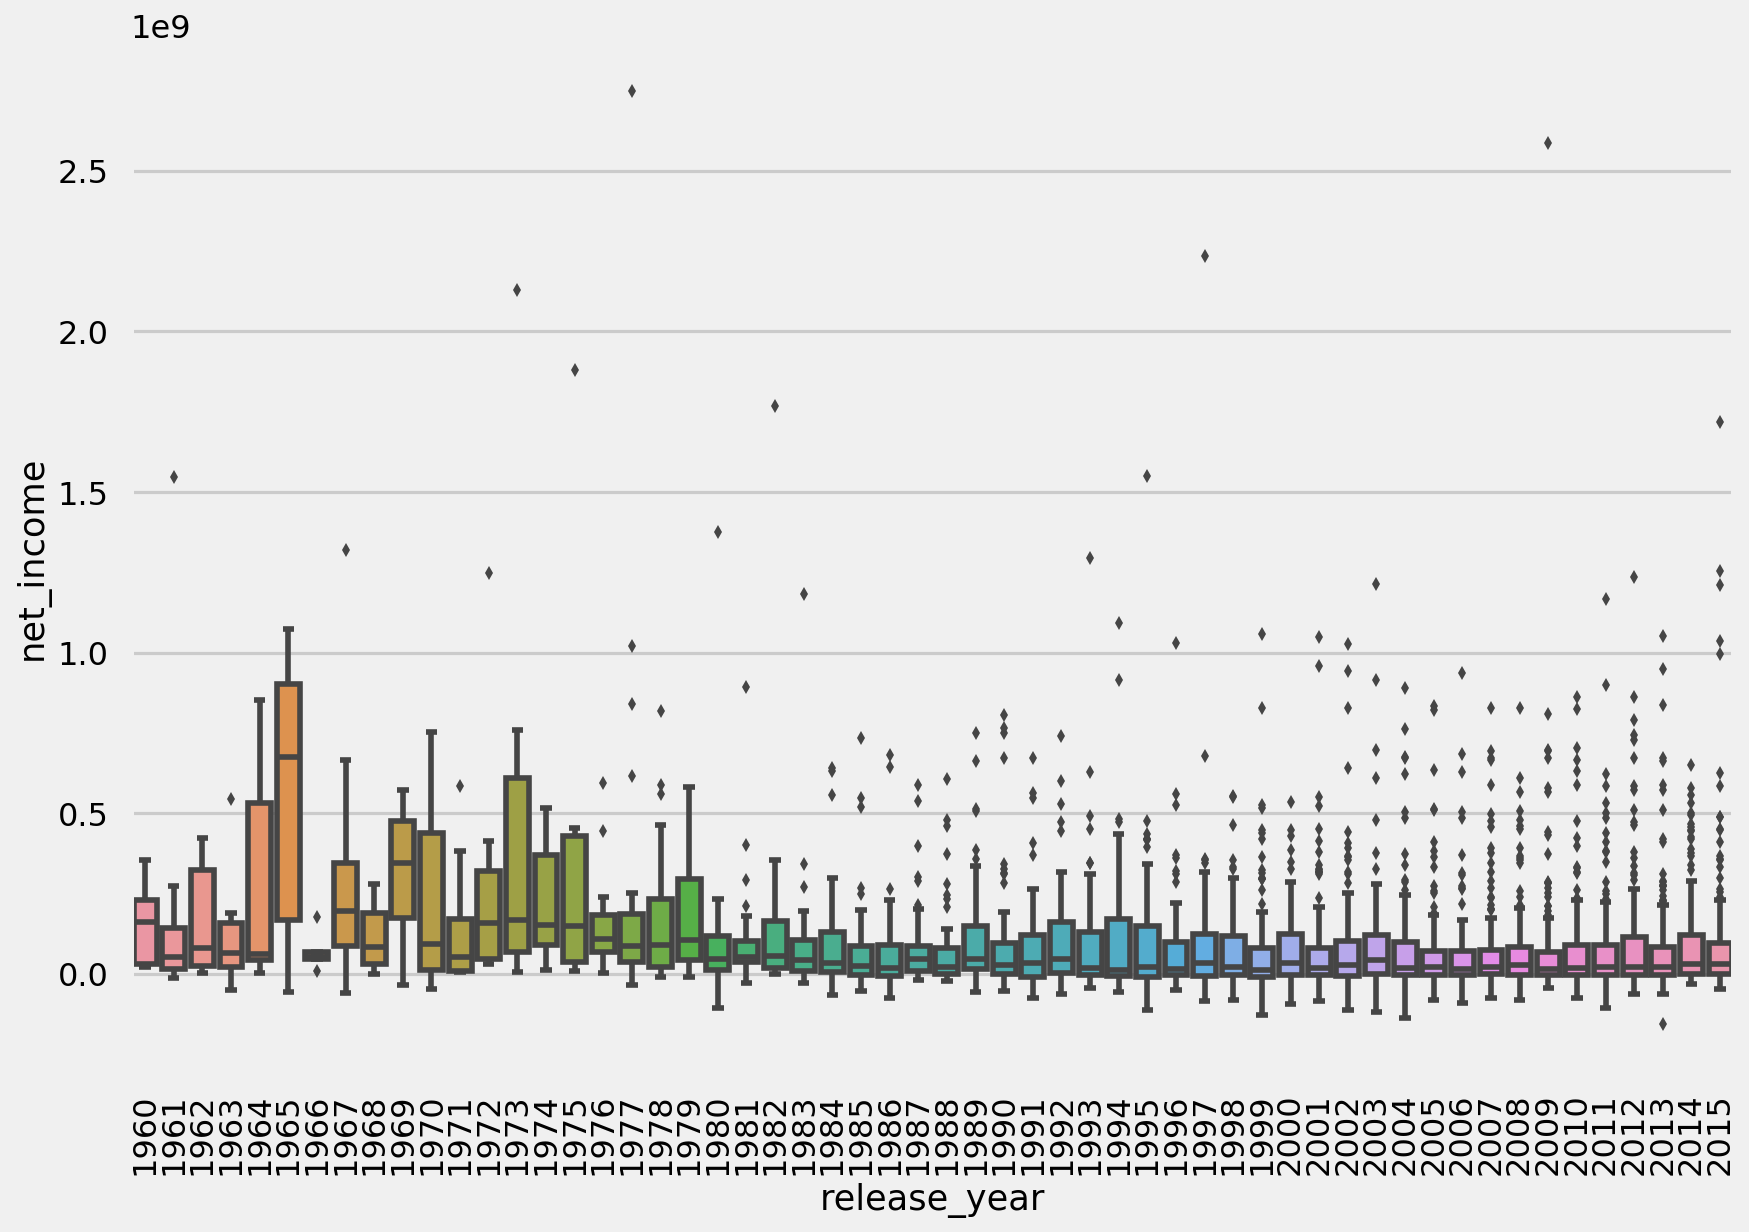

In [27]:
ax = sns.boxplot(x='release_year', y='net_income', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Research Question: Which movies have earned a billion dollars or more?

Which films in history have netted a billion dollars or more (in 2010 dollars)?

In [28]:
df[df['net_income'] >= 1e9][[
    'id', 'original_title', 'release_year', 'net_income'
]]

,id,original_title,release_year,net_income
0,135397,Jurassic World,2015,"1,254,445,953.24"
3,140607,Star Wars: The Force Awakens,2015,"1,718,723,210.76"
4,168259,Furious 7,2015,"1,210,948,878.38"
14,99861,Avengers: Age of Ultron,2015,"1,035,032,450.23"
1329,11,Star Wars,1977,"2,750,136,650.92"
1334,840,Close Encounters of the Third Kind,1977,"1,021,009,368.26"
1386,19995,Avatar,2009,"2,586,236,847.52"
2412,1893,Star Wars: Episode I - The Phantom Menace,1999,"1,059,439,453.10"
2634,671,Harry Potter and the Philosopher's Stone,2001,"1,048,582,021.48"
3374,12445,Harry Potter and the Deathly Hallows: Part 2,2011,"1,166,009,242.24"


## Exploratory Data Analysis



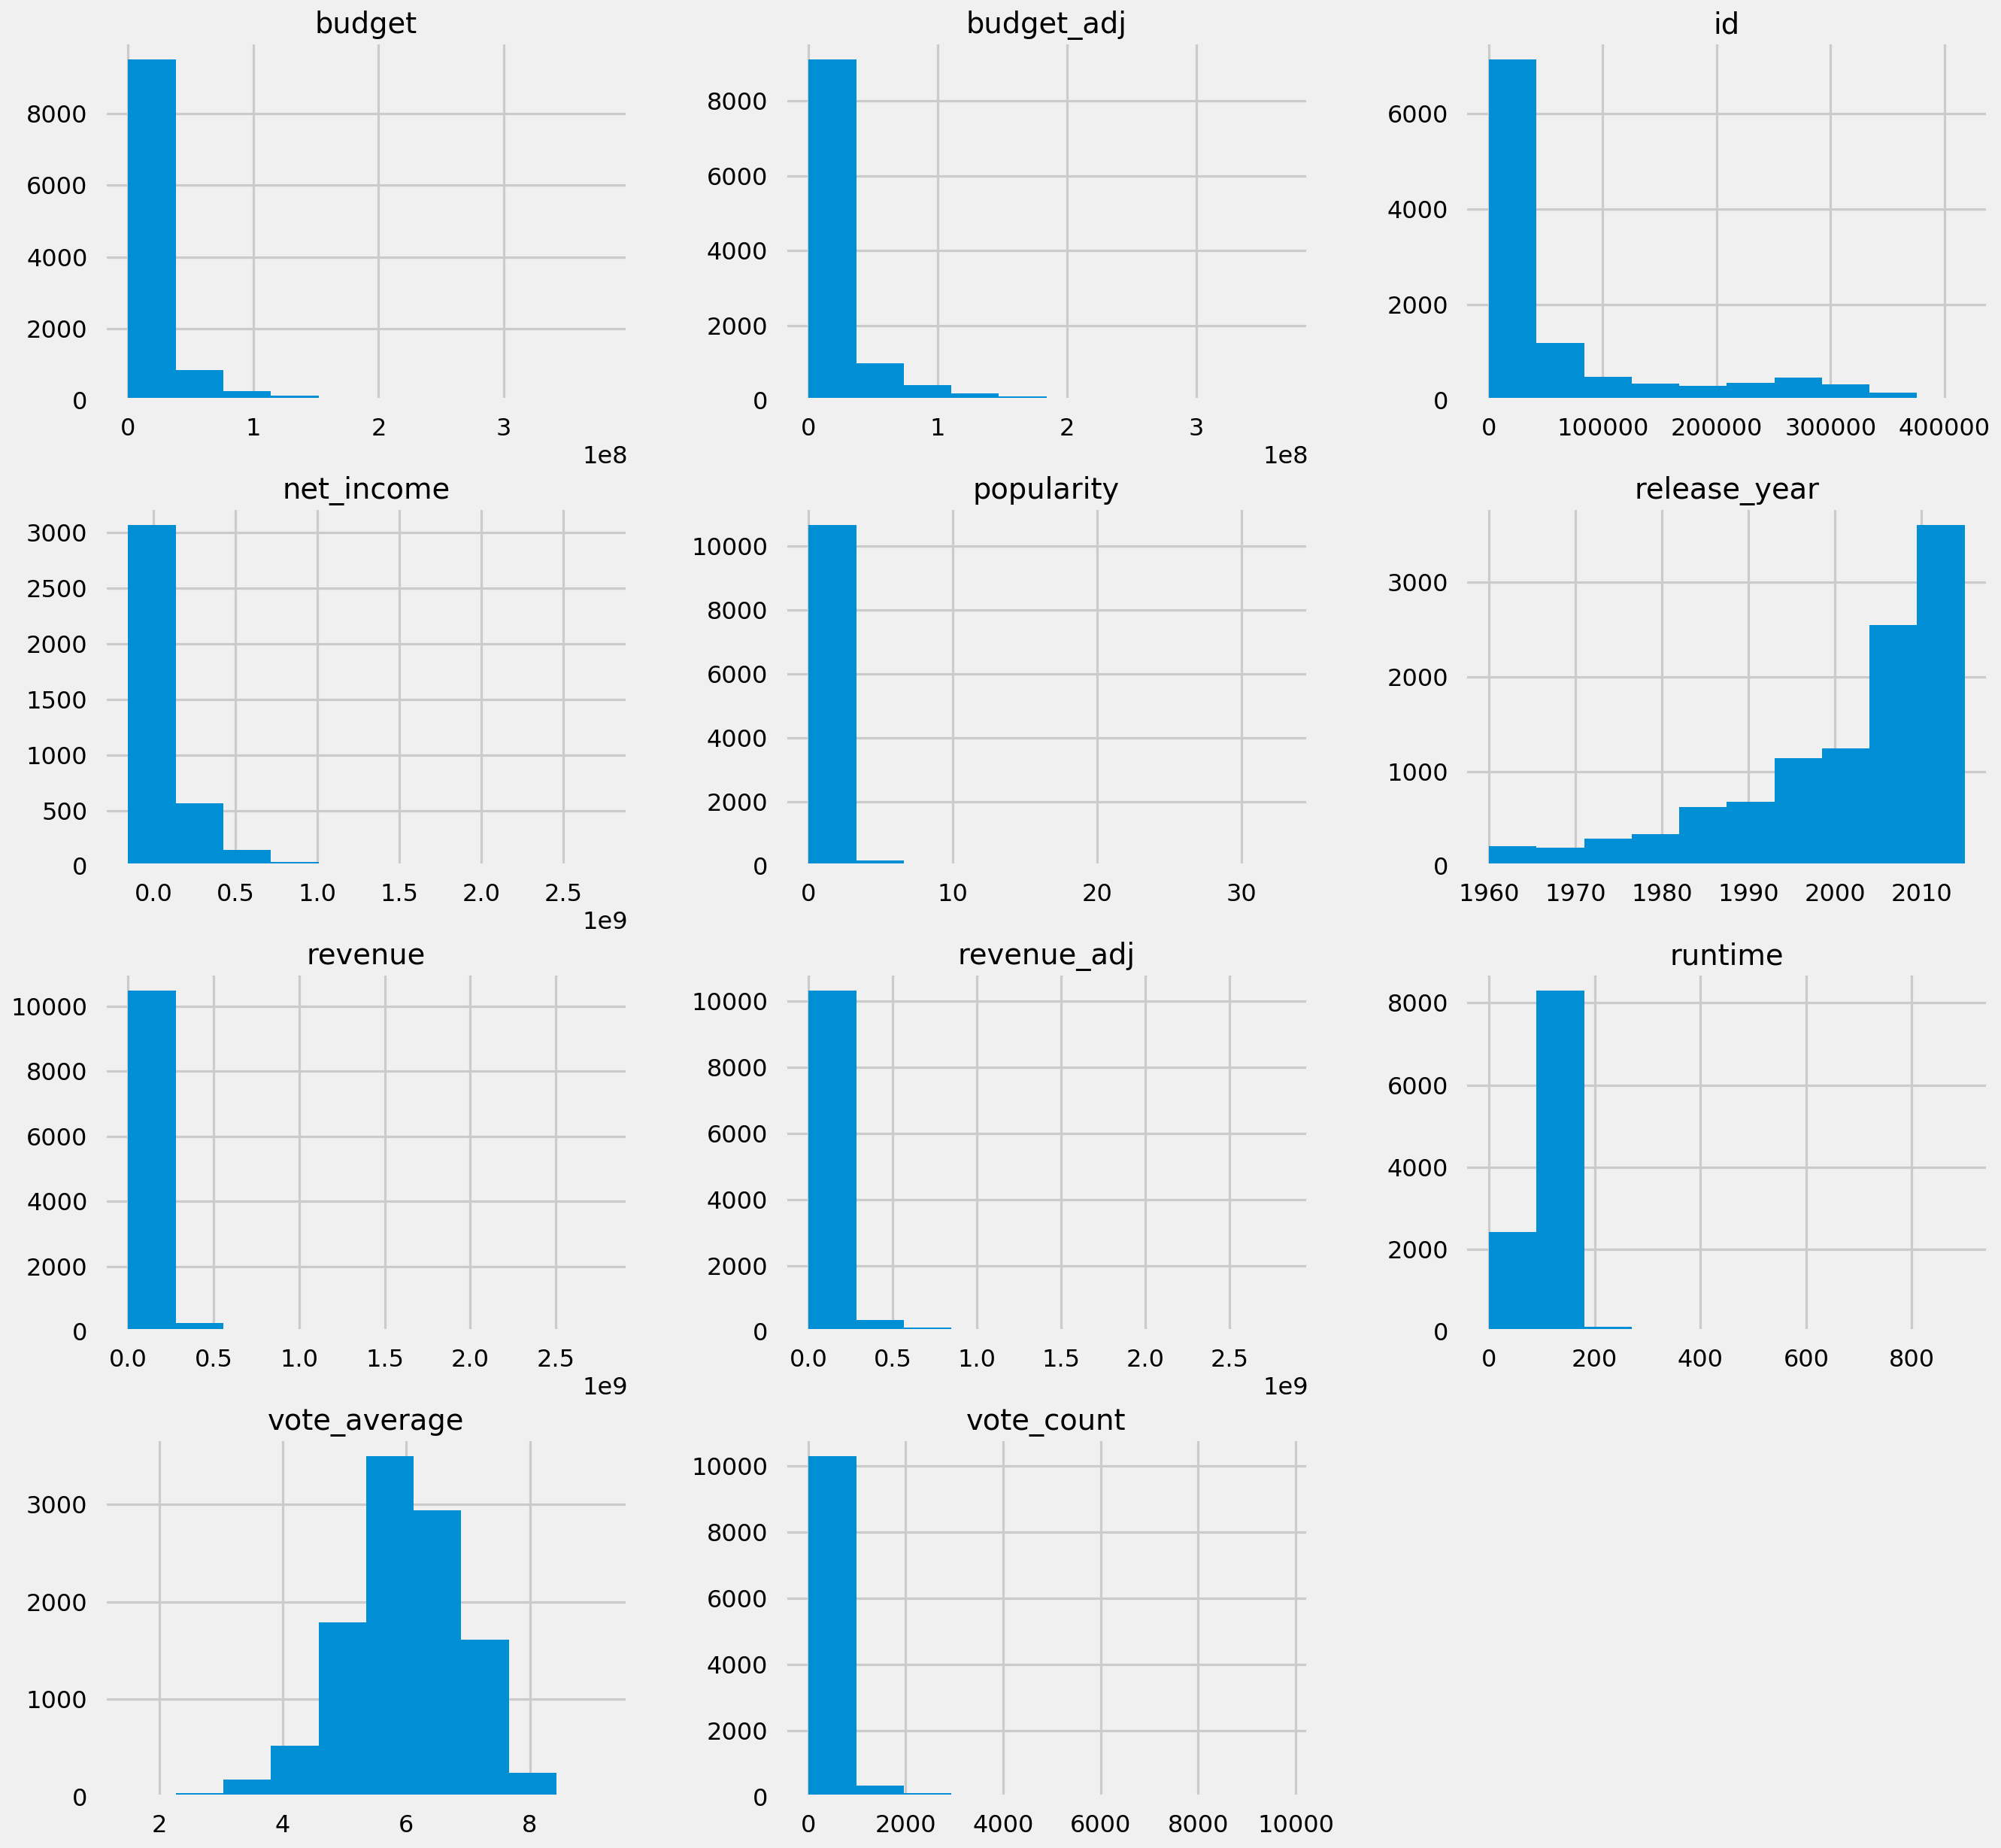

In [29]:
df.hist(figsize=(20,20))
plt.show()

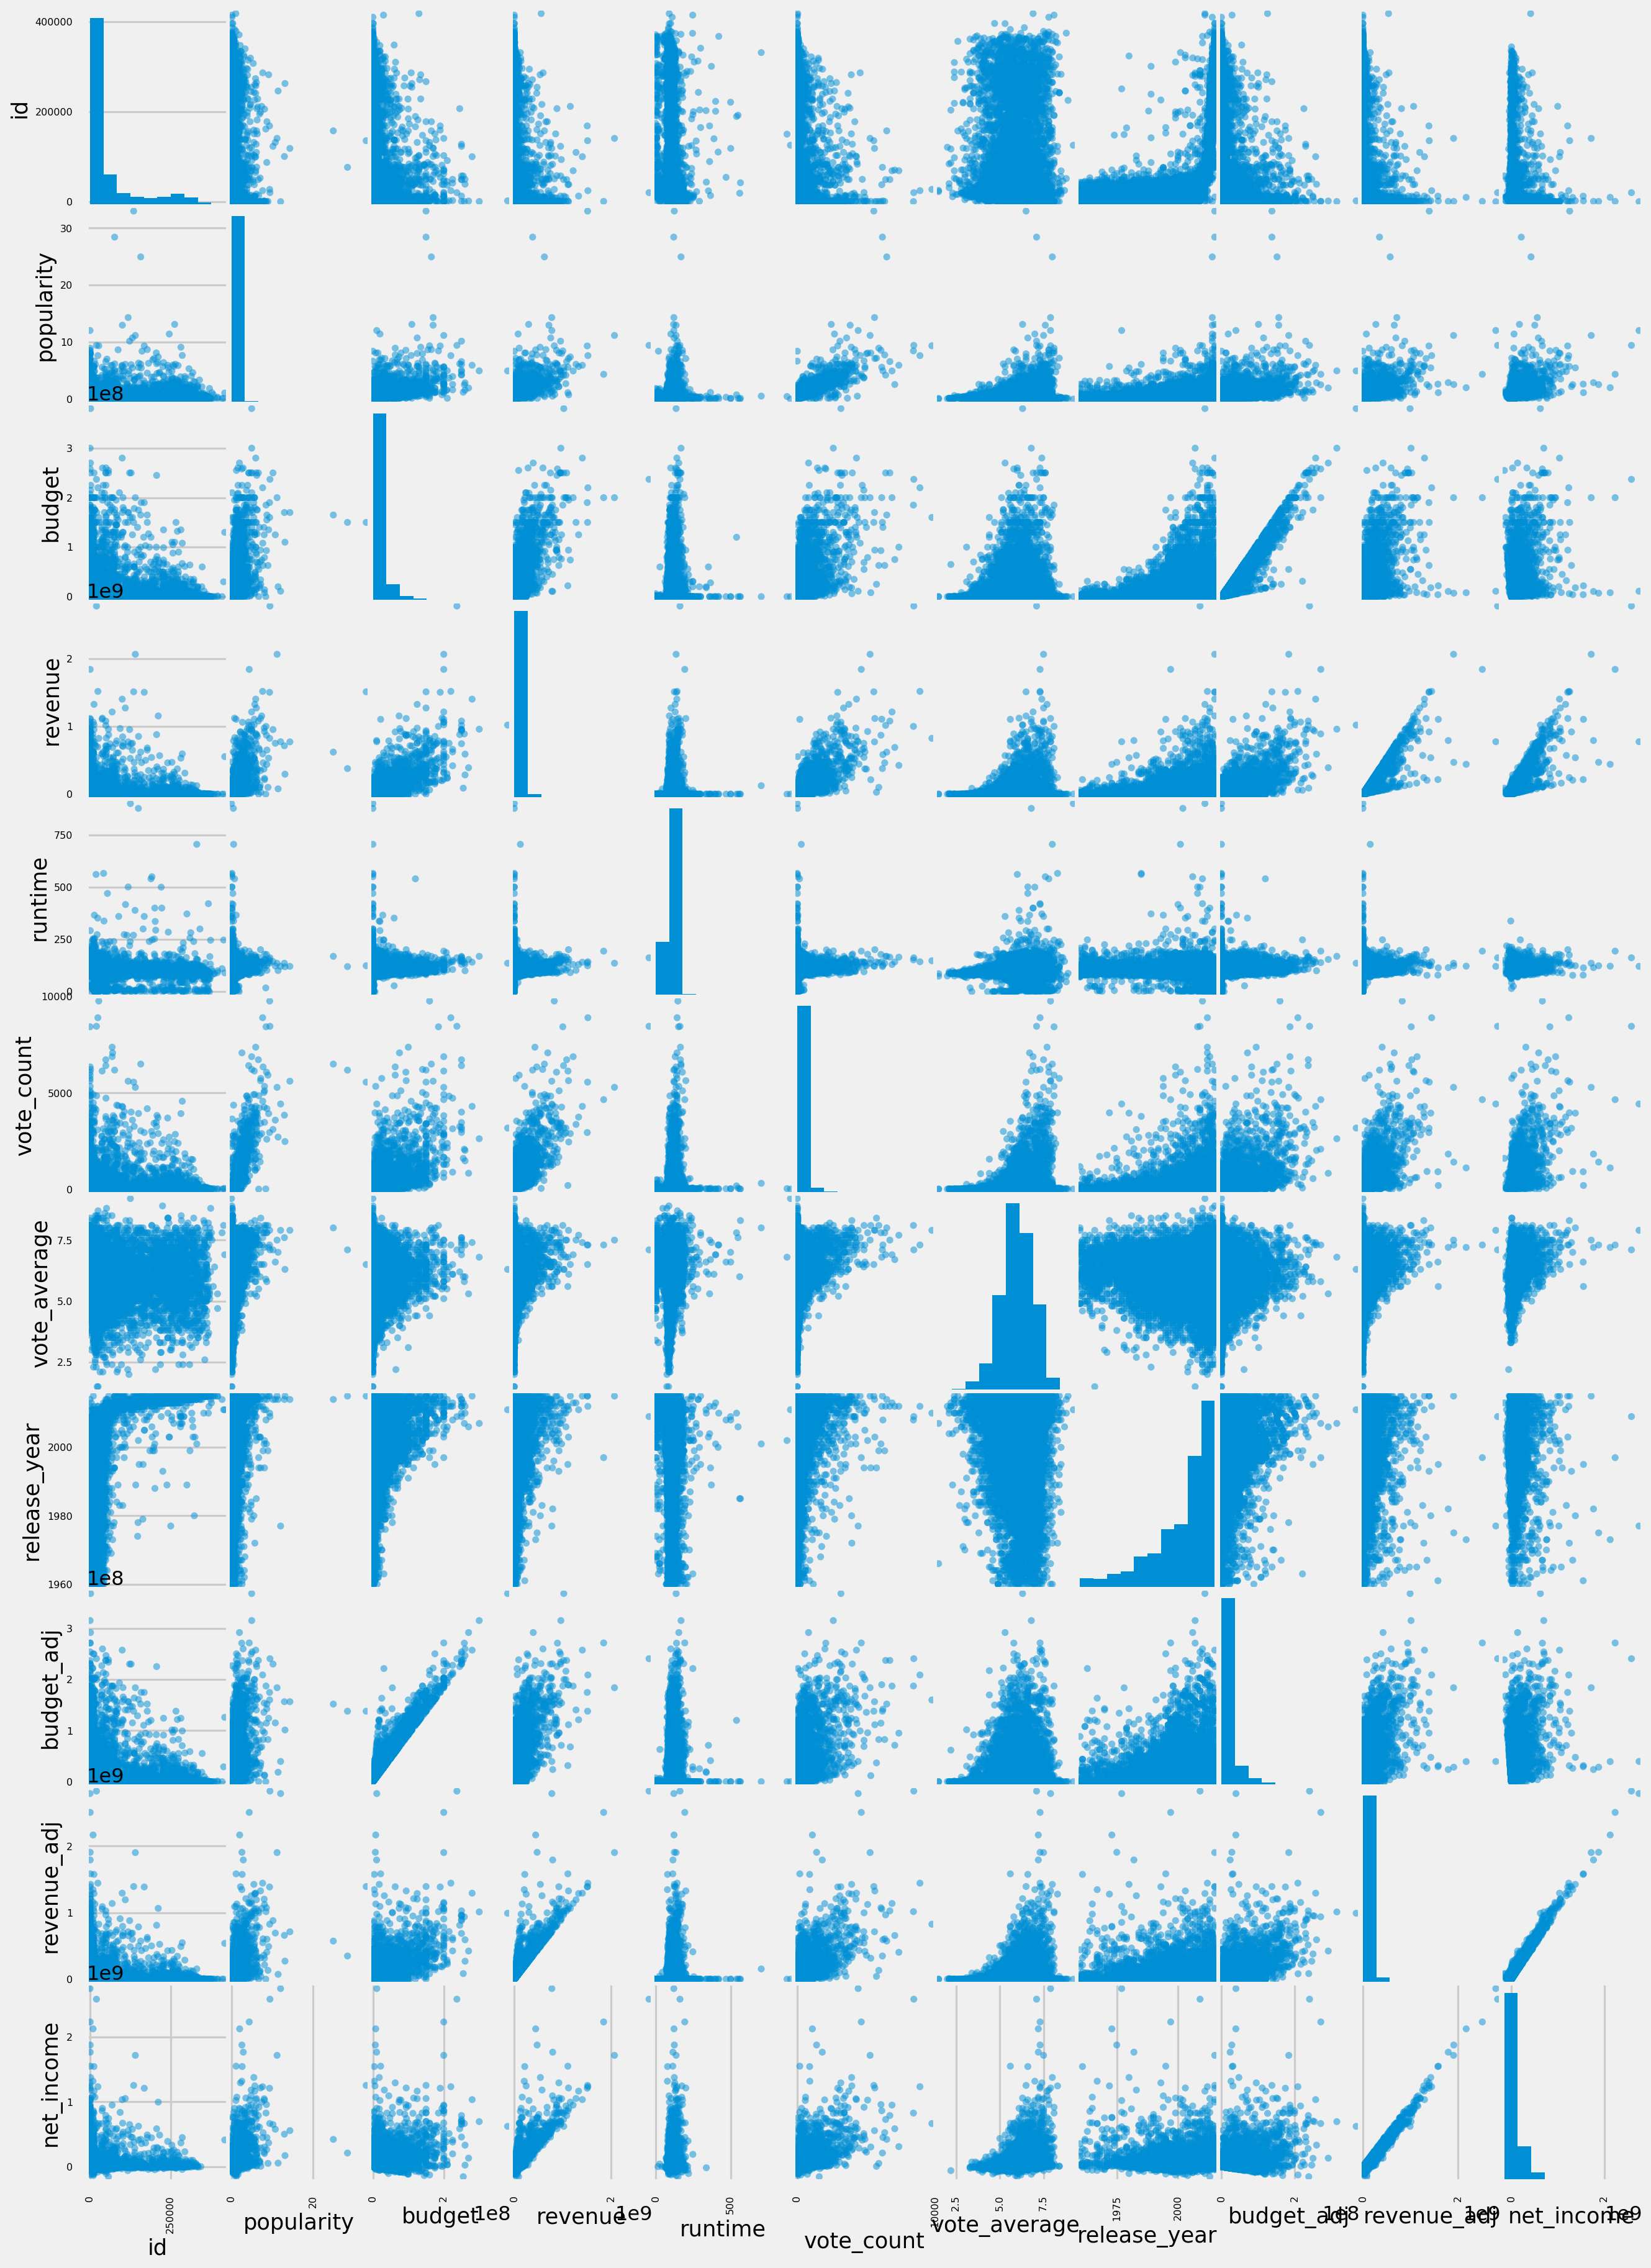

In [30]:
pd.plotting.scatter_matrix(df, figsize=(20, 30))
plt.show()

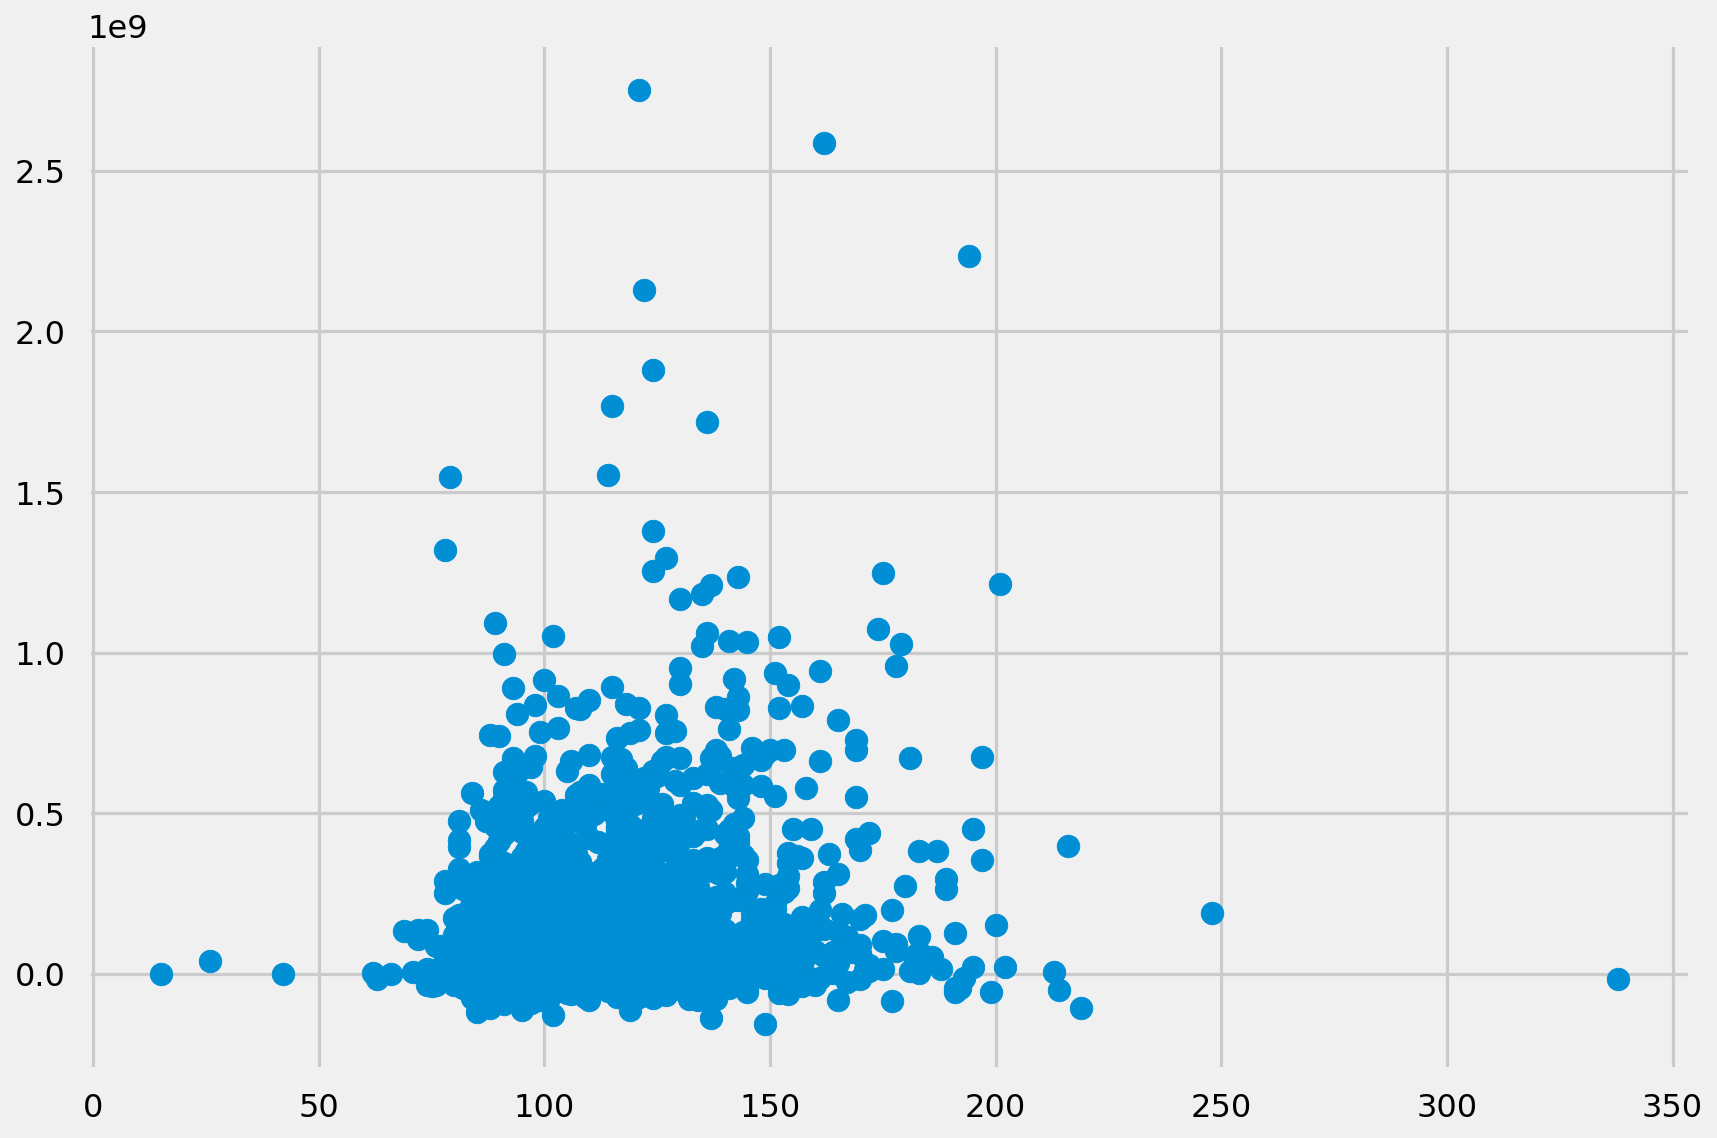

In [31]:
plt.scatter(df['runtime'], df['net_income'])
plt.show()

In [32]:
# Is there any correlation between movie runtime and net income?
df['runtime'].corr(df['net_income'])

0.23514967533525943

### Research Question: What is the most profitable genre?

In [33]:
scifi = df[df['genres'].str.contains('Science Fiction', na=False)]

In [34]:
scifi.sort_values(['net_income'], ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
1329,11,tt0076759,12.04,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.90,1977,"39,575,591.36","2,789,712,242.28","2,750,136,650.92"
1386,19995,tt0499549,9.43,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.10,2009,"240,886,902.89","2,827,123,750.41","2,586,236,847.52"
8889,601,tt0083866,2.90,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,1982-04-03,1830,7.20,1982,"23,726,245.23","1,791,694,309.25","1,767,968,064.02"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80","1,718,723,210.76"
7309,1891,tt0080684,5.49,18000000,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,...,124,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1980-01-01,3954,8.00,1980,"47,628,661.55","1,424,626,187.77","1,376,997,526.22"


In [35]:
scifi.sort_values(['net_income'], ascending=True).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
4078,11692,tt0180052,0.91,100000000,7103973,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,NaN,Ron Underwood,Action's future has arrived...,...,95,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,2002-08-15,75,4.60,2002,"121,226,139.36","8,611,872.21","-112,614,267.15"
8765,10384,tt0134983,0.39,90000000,14828081,Supernova,James Spader|Angela Bassett|Robert Forster|Lou...,NaN,Walter Hill|Jack Sholder,"In the farthest reaches of space, something ha...",...,91,Science Fiction,United Artists|Metro-Goldwyn-Mayer (MGM)|Hamme...,2000-01-14,42,4.70,2000,"113,966,290.29","18,776,682.04","-95,189,608.25"
8999,10153,tt0120184,1.15,75000000,13100000,Sphere,Dustin Hoffman|Sharon Stone|Samuel L. Jackson|...,http://www.warnerbros.com/movies/home-entertai...,Barry Levinson,"A thousand feet beneath the sea, the blackest ...",...,134,Science Fiction,Punch Productions|Warner Bros.|Baltimore Pictu...,1998-02-13,238,5.60,1998,"100,327,160.18","17,523,810.64","-82,803,349.54"
6309,10077,tt0318081,0.63,80000000,5989640,A Sound of Thunder,Heike Makatsch|Armin Rohde|David Oyelowo|Wilfr...,http://asoundofthunder.warnerbros.com/,Peter Hyams,Some Rules Should Never Be Broken.,...,110,Thriller|Science Fiction|Adventure|Action,Epsilon Motion Pictures|Franchise Pictures|Bal...,2005-05-15,58,4.80,2005,"89,325,063.17","6,687,812.14","-82,637,251.03"
9092,9425,tt0120157,0.58,75000000,14567883,Soldier,Kurt Russell|Jason Scott Lee|Jason Isaacs|Conn...,http://www.wb-soldier.com/,Paul W.S. Anderson,Left for dead on a remote planet for obsolete ...,...,99,Action|War|Science Fiction,Impact Pictures|Jerry Weintraub Productions|Wa...,1998-10-23,94,5.80,1998,"100,327,160.18","19,487,391.08","-80,839,769.10"


### Research Question: Keanu Reeves

In [36]:
whoa = df[df['cast'].str.contains('Keanu Reeves', na=False)]

In [37]:
whoa.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
79,263472,tt3605418,2.08,2500000,5214043,Knock Knock,Keanu Reeves|Lorenza Izzo|Ana de Armas|Aaron B...,http://knockknockmovie.tumblr.com/,Eli Roth,One night can cost you everything.,...,99,Drama|Horror|Thriller,Universum Film (UFA)|Dragonfly Entertainment|B...,2015-06-26,473,4.80,2015,"2,299,998.99","4,796,917.45","2,496,918.46"
459,321769,tt3312868,0.21,0,0,Deep Web,Gavin Andresen|Ross Ulbricht|Cody Wilson|Keanu...,http://www.deepwebthemovie.com,Alex Winter,The Crime Saga of the Digital Age,...,90,Documentary,Epix|Trouper Productions|BOND360,2015-03-15,47,6.90,2015,0.00,0.00,nan
632,245891,tt2911666,11.42,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,http://www.johnwickthemovie.com/,Chad Stahelski|David Leitch,Don't set him off.,...,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.00,2014,"18,421,821.02","72,526,614.47","54,104,793.45"
1684,4475,tt1134629,0.34,0,0,The Private Lives of Pippa Lee,Robin Wright|Alan Arkin|Keanu Reeves|Julianne ...,NaN,Rebecca Miller,She lived many lives - except her own.,...,98,Comedy|Drama|Romance,Elevation Filmworks|Grand Army Entertainment,2009-07-07,31,6.10,2009,0.00,0.00,nan
2083,53172,tt1220888,0.60,12000000,204940,Henry's Crime,Keanu Reeves|Vera Farmiga|James Caan|Judy Gree...,NaN,Malcolm Venville,The real crime is not committing to your dreams.,...,108,Action|Comedy|Thriller,Company Films|Moving Pictures Film and Television,2010-01-14,49,5.80,2010,"12,000,000.00","204,940.00","-11,795,060.00"


In [38]:
# How much profit have Keanu Reeves's movies grossed?
whoa.net_income.sum()

3302853048.0192447

In [39]:
whoa.sort_values(['net_income'], ascending=False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
4954,604,tt0234215,4.03,150000000,738599701,The Matrix Reloaded,Keanu Reeves|Carrie-Anne Moss|Laurence Fishbur...,NaN,Lilly Wachowski|Lana Wachowski,Free your mind.,...,138,Adventure|Action|Thriller|Science Fiction,Village Roadshow Pictures|NPV Entertainment|He...,2003-05-15,2376,6.60,2003,"177,802,896.72","875,501,109.02","697,698,212.30"
2410,603,tt0133093,7.75,63000000,463517383,The Matrix,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,http://www.warnerbros.com/matrix,Lilly Wachowski|Lana Wachowski,Welcome to the Real World.,...,136,Action|Science Fiction,Village Roadshow Pictures|Groucho II Film Part...,1999-03-30,6351,7.80,1999,"82,470,329.34","606,768,749.66","524,298,420.33"
4181,1637,tt0111257,2.54,30000000,350448145,Speed,Keanu Reeves|Sandra Bullock|Dennis Hopper|Jeff...,NaN,Jan de Bont,Get ready for rush hour,...,116,Action|Adventure|Crime|Thriller,Twentieth Century Fox Film Corporation,1994-06-09,1012,6.60,1994,"44,133,346.85","515,548,317.85","471,414,971.00"
4953,605,tt0242653,4.21,150000000,424988211,The Matrix Revolutions,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,NaN,Lilly Wachowski|Lana Wachowski,Everything that has a beginning has an end.,...,129,Adventure|Action|Thriller|Science Fiction,Village Roadshow Pictures|NPV Entertainment|Si...,2003-11-05,2138,6.40,2003,"177,802,896.72","503,760,899.91","325,958,003.19"
8248,6114,tt0103874,1.43,40000000,215862692,Dracula,Gary Oldman|Winona Ryder|Anthony Hopkins|Keanu...,NaN,Francis Ford Coppola,Love never dies.,...,128,Romance|Horror,American Zoetrope|Columbia Pictures Corporatio...,1992-11-13,545,6.80,1992,"62,160,970.18","335,455,859.03","273,294,888.85"


In [40]:
whoa.sort_values(['net_income'], ascending=True).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_income
10335,1689,tt0107426,0.32,35000000,4858139,Little Buddha,Keanu Reeves|Bridget Fonda|Chris Isaak|Ruochen...,NaN,Bernardo Bertolucci,A magical journey to a place where the past an...,...,140,Drama|History,Miramax Films,1993-12-01,33,5.80,1993,"52,831,448.66","7,333,214.89","-45,498,233.77"
5462,64686,tt1335975,1.92,175000000,150962475,47 Ronin,Keanu Reeves|Hiroyuki Sanada|Kou Shibasaki|Tad...,NaN,Carl Rinsch,For courage. For loyalty. For honour.,...,118,Action|Adventure|Fantasy,Mid Atlantic Films|Stuber Productions|Universa...,2013-12-06,940,5.80,2013,"163,805,836.73","141,305,911.61","-22,499,925.12"
5598,76544,tt2016940,0.71,25000000,2054941,Man of Tai Chi,Keanu Reeves|Tiger Hu Chen|Jeremy Marinas|Stev...,NaN,Keanu Reeves,No Rules. No Mercy. Pure Fighting.,...,105,Action|Drama,Universal Pictures|Village Roadshow Pictures|C...,2013-07-04,193,5.60,2013,"23,400,833.82","1,923,493.31","-21,477,340.50"
2083,53172,tt1220888,0.60,12000000,204940,Henry's Crime,Keanu Reeves|Vera Farmiga|James Caan|Judy Gree...,NaN,Malcolm Venville,The real crime is not committing to your dreams.,...,108,Action|Comedy|Thriller,Company Films|Moving Pictures Film and Television,2010-01-14,49,5.80,2010,"12,000,000.00","204,940.00","-11,795,060.00"
8096,9886,tt0113481,1.09,26000000,19075720,Johnny Mnemonic,Keanu Reeves|Dina Meyer|Takeshi Kitano|Ice-T|D...,NaN,Robert Longo,The hottest data on earth. In the coolest head...,...,97,Adventure|Action|Drama|Science Fiction|Thriller,TriStar Pictures|Alliance Communications Corpo...,1995-05-26,182,5.30,1995,"37,205,138.54","27,296,723.29","-9,908,415.26"


## Other Questions

Which genres are
most popular from
year to year? What
kinds of properties
are associated with
movies that have high
revenues?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!